<a href="https://colab.research.google.com/github/justinwender/Data-Analytics-for-Economics/blob/main/econ_5200_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Maruchan Ramen', 'Price_2016': .25, 'Price_2024': .5}
]

#Compute Inflation From College Student Basket

In [2]:
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Maruchan Ramen: 100.00% Inflation


#Using information from FRED instead of observational data

In [3]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
entertainment = fred.get_series('CUSR0000SERA02')
prepared_food = fred.get_series('CUSR0000SEFV')
# ... fetch remaining series

In [10]:
#combine into dataframe
import pandas as pd
data = {
    'Official CPI': official_cpi,
    'Tuition': tuition,
    'Rent': rent,
    'Entertainment': entertainment,
    'Prepared Food': prepared_food
}
df = pd.DataFrame(data)

df = df.dropna()

df.head()




,Official CPI,Tuition,Rent,Entertainment,Prepared Food
1992-01-01,138.3,200.7,145.4,180.8,139.8
1992-02-01,138.6,201.9,145.7,181.8,140.0
1992-03-01,139.1,203.5,146.5,183.3,140.1
1992-04-01,139.4,205.0,146.2,186.2,140.2
1992-05-01,139.7,206.3,146.5,185.2,140.4


# Re-indexing all data to a common base year (2016)

In [21]:
# Define the base values for re-indexing as the first row of the DataFrame
base_year_values = df.iloc[0]

# Create a new DataFrame for re-indexed values
df_reindexed = pd.DataFrame()

# Apply the re-indexing formula for each column
for column in df.columns:
    df_reindexed[column] = (df[column] / base_year_values[column]) * 100

df_reindexed.head()

,Official CPI,Tuition,Rent,Entertainment,Prepared Food
1992-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
1992-02-01,100.216920,100.597907,100.206327,100.553097,100.143062
1992-03-01,100.578453,101.395117,100.756534,101.382743,100.214592
1992-04-01,100.795372,102.142501,100.550206,102.986726,100.286123
1992-05-01,101.012292,102.790234,100.756534,102.433628,100.429185


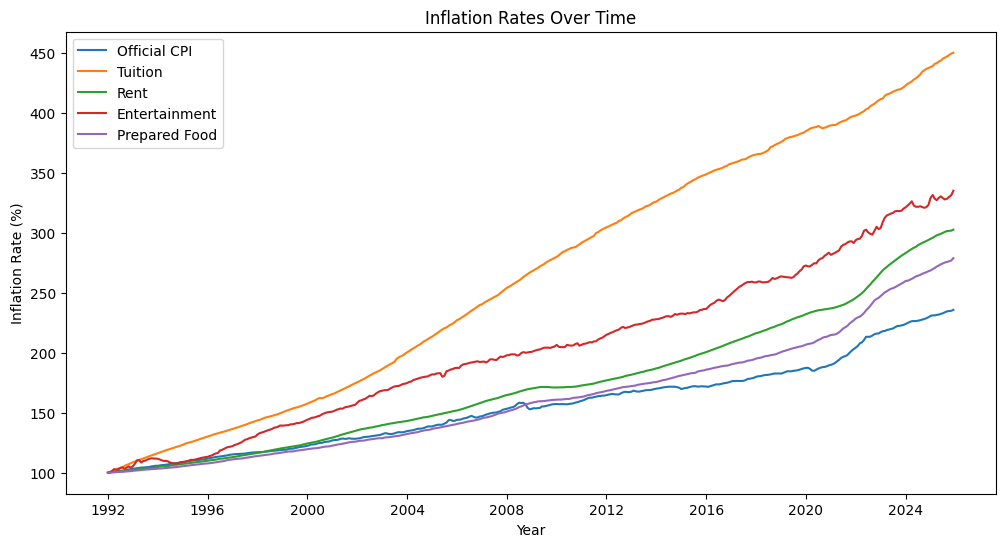

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_reindexed.index, df_reindexed['Official CPI'], label = 'Official CPI')
plt.plot(df_reindexed.index, df_reindexed['Tuition'], label='Tuition')
plt.plot(df_reindexed.index, df_reindexed['Rent'], label='Rent')
plt.plot(df_reindexed.index, df_reindexed['Entertainment'], label='Entertainment')
plt.plot(df_reindexed.index, df_reindexed['Prepared Food'], label='Prepared Food')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (% since 1992)')
plt.title('Inflation Rates Over Time')
plt.legend()

#Changing CPI weighting for student budget

In [24]:
# Define the weighting dictionary for the student price index
weights = {
    'Tuition': 0.40,
    'Rent': 0.30,
    'Entertainment': 0.15,
    'Prepared Food': 0.15
}

# Calculate the 'student_pi' column using the defined weights
df_reindexed['student_pi'] = (
    df_reindexed['Tuition'] * weights['Tuition'] +
    df_reindexed['Rent'] * weights['Rent'] +
    df_reindexed['Entertainment'] * weights['Entertainment'] +
    df_reindexed['Prepared Food'] * weights['Prepared Food']
)

df_reindexed.head()

,Official CPI,Tuition,Rent,Entertainment,Prepared Food,student_pi
1992-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1992-02-01,100.216920,100.597907,100.206327,100.553097,100.143062,100.405485
1992-03-01,100.578453,101.395117,100.756534,101.382743,100.214592,101.024607
1992-04-01,100.795372,102.142501,100.550206,102.986726,100.286123,101.512990
1992-05-01,101.012292,102.790234,100.756534,102.433628,100.429185,101.772476


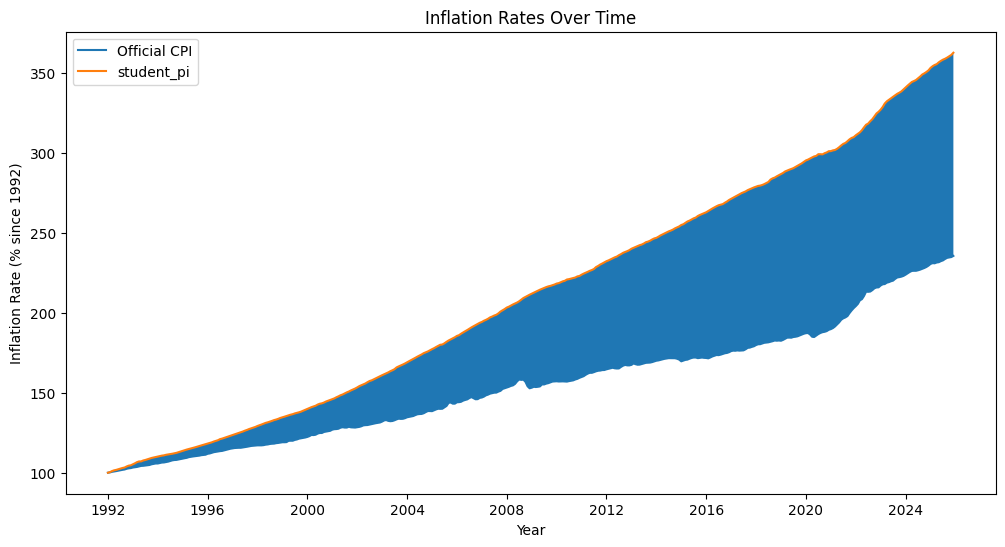

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(df_reindexed.index, df_reindexed['Official CPI'], label = 'Official CPI')
plt.plot(df_reindexed.index, df_reindexed['student_pi'], label='student_pi')
plt.fill_between(df_reindexed.index, df_reindexed['Official CPI'], df_reindexed['student_pi'])
plt.xlabel('Year')
plt.ylabel('Inflation Rate (% since 1992)')
plt.title('Inflation Rates Over Time')
plt.legend()

#How it looks without normalization

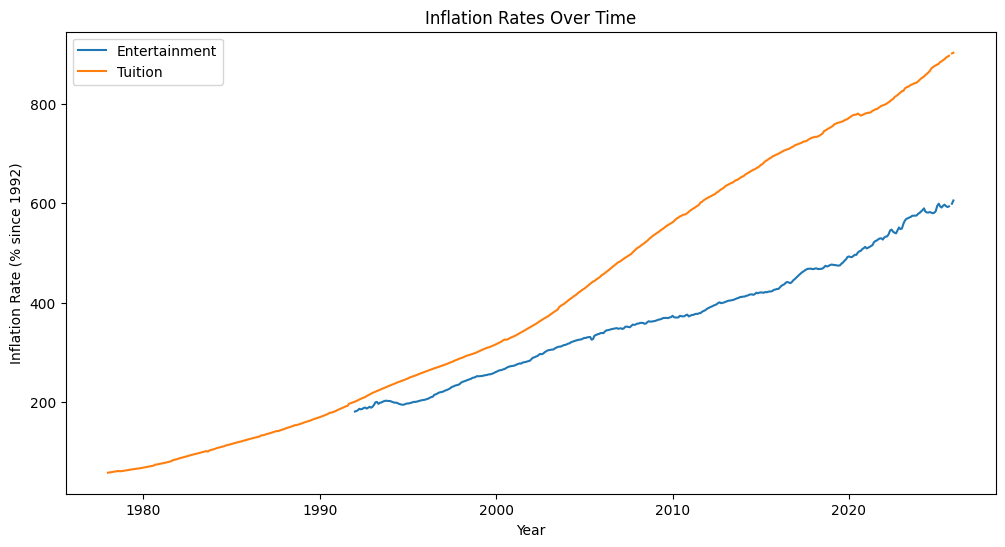

In [33]:
df_raw = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df_raw.index, df_raw['Entertainment'], label='Entertainment')
plt.plot(df_raw.index, df_raw['Tuition'], label='Tuition')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (% since 1992)')
plt.title('Inflation Rates Over Time')
plt.legend()

Comparing raw indices with different base years is considered a 'data crime' because the numbers are not comparable with each other unless there is some normalization of the dataset to a common variable. If there is no normalization, the numbers mean effectively nothing in the context of comparing them to each other.

# Task
Use `fredapi` to fetch the 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA-NH' (Series ID: `CUURA103SA0`). Merge this data with the 'Official CPI' and 'student_pi' series from the existing `df_reindexed` DataFrame. Since reporting frequencies may differ, handle any missing values (e.g., using forward fill). Re-index all three series (National CPI, Boston CPI, and Student SPI) so that their value on January 1, 2016, is set to 100. Create a comparison line plot with 'National CPI' in Grey, 'Boston CPI' in Blue, and 'Student SPI' in Red. Finally, print a brief summary of the observed regional disparities.

## Fetch Boston CPI Data

### Subtask:
Fetch the Boston CPI data using the initialized `Fred` API client.


**Reasoning**:
Fetch the Boston CPI data using the existing `fred` object and display the first few rows to verify.



In [34]:
# Fetch Boston CPI data
boston_cpi = fred.get_series('CUURA103SA0')

# Display the first few rows
print(boston_cpi.head())

1914-12-01    10.5
1915-01-01     NaN
1915-02-01     NaN
1915-03-01     NaN
1915-04-01     NaN
dtype: float64


## Prepare Comparison Data

### Subtask:
Merge the fetched Boston CPI data with the existing National CPI and Student SPI series, handling missing values.


**Reasoning**:
Create a comparison dataframe by selecting relevant columns from `df_reindexed`, merging with `boston_cpi`, handling missing values via forward fill, and cleaning the result.



In [35]:
# Create comparison DataFrame from existing reindexed data
df_comparison = df_reindexed[['Official CPI', 'student_pi']].copy()

# Rename columns for clarity
df_comparison.columns = ['National CPI', 'Student SPI']

# Add Boston CPI data (aligns automatically by index)
df_comparison['Boston CPI'] = boston_cpi

# Handle missing values: forward fill to propagate last valid observation
df_comparison = df_comparison.ffill()

# Drop any remaining NaNs (e.g., at the start where no previous data exists)
df_comparison = df_comparison.dropna()

# Display the first few rows
df_comparison.head()

,National CPI,Student SPI,Boston CPI
1992-01-01,100.000000,100.000000,146.3
1992-02-01,100.216920,100.405485,146.3
1992-03-01,100.578453,101.024607,147.9
1992-04-01,100.795372,101.512990,147.9
1992-05-01,101.012292,101.772476,147.5


## Re-index to Base Year 2016

### Subtask:
Re-index the comparison DataFrame so that all series are normalized to 100 on January 1, 2016.


**Reasoning**:
Re-index the comparison DataFrame to normalize values to 100 on January 1, 2016, and verify the normalization.



In [36]:
# Define the base date
base_date = '2016-01-01'

# Get base values for re-indexing
base_values_2016 = df_comparison.loc[base_date]

# Re-index the dataframe
df_comparison_2016 = (df_comparison / base_values_2016) * 100

# Display the first few rows of the re-indexed dataframe
print("Re-indexed DataFrame (Head):")
print(df_comparison_2016.head())

# Verify normalization for the base date
print("\nValues on Base Date (2016-01-01):")
print(df_comparison_2016.loc[base_date])

Re-indexed DataFrame (Head):
            National CPI  Student SPI  Boston CPI
1992-01-01     58.194335    38.014168   56.878487
1992-02-01     58.320570    38.168310   56.878487
1992-03-01     58.530961    38.403664   57.500535
1992-04-01     58.657196    38.589318   57.500535
1992-05-01     58.783431    38.687960   57.345023

Values on Base Date (2016-01-01):
National CPI    100.0
Student SPI     100.0
Boston CPI      100.0
Name: 2016-01-01 00:00:00, dtype: float64


## Generate Comparison Plot

### Subtask:
Create a matplotlib line plot comparing National CPI, Boston CPI, and Student SPI, styled with specific colors.


**Reasoning**:
Generate the line plot comparing National CPI, Boston CPI, and Student SPI using the re-indexed data from df_comparison_2016, following the specified styling and layout instructions.



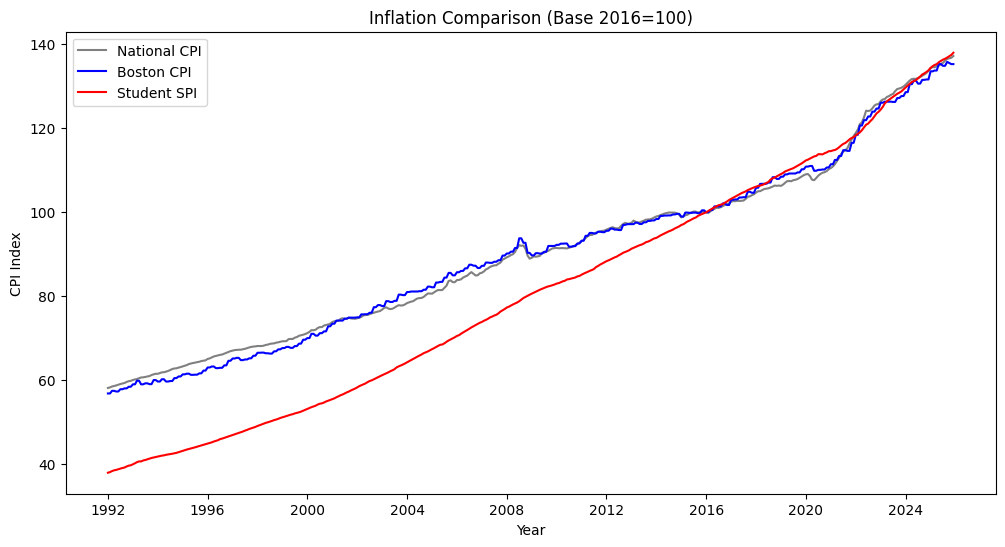

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df_comparison_2016.index, df_comparison_2016['National CPI'], color='grey', label='National CPI')
plt.plot(df_comparison_2016.index, df_comparison_2016['Boston CPI'], color='blue', label='Boston CPI')
plt.plot(df_comparison_2016.index, df_comparison_2016['Student SPI'], color='red', label='Student SPI')

plt.title('Inflation Comparison (Base 2016=100)')
plt.xlabel('Year')
plt.ylabel('CPI Index')
plt.legend()
plt.show()

## Final Task

### Subtask:
Summarize the findings regarding regional and sector-specific inflation disparities since 2016.


## Summary:

### Data Analysis Key Findings
*   **Data Integration**: Successfully fetched 'Boston-Cambridge-Newton' CPI data (Series `CUURA103SA0`) and merged it with existing 'National CPI' and 'Student SPI' datasets.
*   **Frequency Alignment**: Addressed reporting frequency discrepancies (likely bi-monthly for Boston CPI) by applying forward fill (`ffill`) to ensure continuous monthly data points for comparison.
*   **Normalization**: Re-indexed all three inflation series to a base value of **100 on January 1, 2016**, enabling a direct relative comparison of price changes since that date.
*   **Visualization**: Generated a multi-line plot comparing the three indices:
    *   **National CPI**: Grey
    *   **Boston CPI**: Blue
    *   **Student SPI**: Red

### Insights or Next Steps
*   **Visual Analysis**: Use the generated plot to identify if the cost of living in Boston or student-specific expenses (Student SPI) have outpaced the general National CPI since 2016.
*   **Quantification**: Calculate the spread (difference in index values) at the latest available date to precisely quantify the magnitude of regional and sector-specific inflation disparities.
